# Decision Trees and Random Forests in Python

# Install this package before starting this lab

In [25]:
!pip install pydot
!pip install pyparsing
!apt-get install graphviz

    100% |████████████████████████████████| 133kB 3.5MB/s 
  Running setup.py bdist_wheel for pydot ... - done
  Stored in directory: /content/.cache/pip/wheels/6a/a5/14/25541ebcdeaf97a37b6d05c7ff15f5bd20f5e91b99d313e5b4
Successfully built pydot
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fontconfig libcairo2 libcdt5 libcgraph6 libdatrie1 libgd3 libgraphite2-3
  libgvc6 libgvpr2 libharfbuzz0b libjbig0 libltdl7 libpango-1.0-0
  libpangocairo-1.0-0 libpangoft2-1.0-0 libpathplan4 libpixman-1-0
  libthai-data libthai0 libtiff5 libwebp6 libxaw7 libxcb-render0 libxcb-shm0
  libxmu6 libxpm4 libxt6
Suggested packages:
  gsfonts graphviz-doc libgd-tools
The following NEW packages will be installed:
  fontconfig graphviz libcairo2 libcdt5 libcgraph6 libdatrie1 libgd3
  libgraphite2-3 libgvc6 libgvpr2 libharfbuzz0b libjbig0 libltdl7
  libpango-1.0-0 libpangocairo-1.0-0 libpangoft2-1.0-0 li

Selecting previously unselected package libpixman-1-0:amd64.
Preparing to unpack .../08-libpixman-1-0_0.34.0-1_amd64.deb ...
Unpacking libpixman-1-0:amd64 (0.34.0-1) ...
Selecting previously unselected package libxcb-render0:amd64.
Preparing to unpack .../09-libxcb-render0_1.12-1ubuntu1_amd64.deb ...
Unpacking libxcb-render0:amd64 (1.12-1ubuntu1) ...
Selecting previously unselected package libxcb-shm0:amd64.
Preparing to unpack .../10-libxcb-shm0_1.12-1ubuntu1_amd64.deb ...
Unpacking libxcb-shm0:amd64 (1.12-1ubuntu1) ...
Selecting previously unselected package libcairo2:amd64.
Preparing to unpack .../11-libcairo2_1.14.10-1ubuntu1_amd64.deb ...
Unpacking libcairo2:amd64 (1.14.10-1ubuntu1) ...
Selecting previously unselected package libltdl7:amd64.
Preparing to unpack .../12-libltdl7_2.4.6-2_amd64.deb ...
Unpacking libltdl7:amd64 (2.4.6-2) ...
Selecting previously unselected package libthai-data.
Preparing to unpack .../13-libthai-data_0.1.26-3_all.deb ...
Unpacking libthai-data (0.1.26-

In [0]:
from google.colab import files
import io 

uploaded = files.upload()

## Import Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data

In [0]:
df = pd.read_csv('data.csv')

In [28]:
print(df.shape)
df.head()

(4591, 19)


,SerialNumber,Leave,ActionYear,WorkDurationYear,CountLoan,Avg_MonthPerLoan,HireType,HireSourceGroup,WorkDurationYear.1,Avg_TotalAbsensePerYear,Avg_NumDaysPerAbsense,TotalEduAllowance,NumYear_SinceLastEduAllowance,TotalEduAttend,EduBranch_CHEM,EduBranch_Finance,EduBranch_Languages,Max_EduInstituteGroup,NumYear_SinceLastEdu
0,4,1.0,2000,39.0,0.0,0.0,Unknown,Unknown,39.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Unknown,41.0
1,5,1.0,2000,39.0,0.0,0.0,Unknown,Unknown,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UNIV,40.0
2,6,1.0,2000,38.0,0.0,0.0,Unknown,Unknown,38.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Unknown,47.0
3,7,1.0,2000,38.0,0.0,0.0,Unknown,Unknown,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SCHL,39.0
4,10,1.0,2000,38.0,0.0,0.0,Unknown,Unknown,38.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Unknown,38.0


## To Dummy Code

In [0]:
dfEduInstituteGroup = pd.get_dummies(df['Max_EduInstituteGroup'], prefix='Max_EduInstituteGroup')
dfHireTypeGroup = pd.get_dummies(df['HireType'], prefix='HireType')
dfHireSourceGroup = pd.get_dummies(df['HireSourceGroup'], prefix='HireSourceGroup')

#df = df.drop(['EduInstituteGroup','HireTypeGroup','HireSourceGroup'], axis=1)

df = pd.concat([df, dfEduInstituteGroup,dfHireTypeGroup,dfHireSourceGroup], axis=1)


In [30]:
print(df.shape)
df.head()

(4591, 40)


,SerialNumber,Leave,ActionYear,WorkDurationYear,CountLoan,Avg_MonthPerLoan,HireType,HireSourceGroup,WorkDurationYear.1,Avg_TotalAbsensePerYear,...,HireType_Experienced Hire,HireType_Inexperienced Hire,HireType_Unknown,HireSourceGroup_Agency,HireSourceGroup_Campus/Fair,HireSourceGroup_Contractor Conversion,HireSourceGroup_Other,HireSourceGroup_Referral,HireSourceGroup_Unknown,HireSourceGroup_Website/Ads
0,4,1.0,2000,39.0,0.0,0.0,Unknown,Unknown,39.0,0.0,...,0,0,1,0,0,0,0,0,1,0
1,5,1.0,2000,39.0,0.0,0.0,Unknown,Unknown,39.0,0.0,...,0,0,1,0,0,0,0,0,1,0
2,6,1.0,2000,38.0,0.0,0.0,Unknown,Unknown,38.0,0.0,...,0,0,1,0,0,0,0,0,1,0
3,7,1.0,2000,38.0,0.0,0.0,Unknown,Unknown,38.0,0.0,...,0,0,1,0,0,0,0,0,1,0
4,10,1.0,2000,38.0,0.0,0.0,Unknown,Unknown,38.0,0.0,...,0,0,1,0,0,0,0,0,1,0


## Train Test Split

Let's split up the data into a training set and a test set!

In [0]:
from sklearn.model_selection import train_test_split

In [32]:
df_train = df[ df['ActionYear'] < 2017]
df_train.shape

(3469, 40)

In [33]:
df_test = df[ df['ActionYear'] >= 2017]
df_test.shape

(1122, 40)

In [0]:
df_train_variable = df_train.drop(['SerialNumber','ActionYear','Leave','Max_EduInstituteGroup','HireType','HireSourceGroup'],axis=1)
df_train_label = df_train['Leave']

df_test_variable = df_test.drop(['SerialNumber','ActionYear','Leave','Max_EduInstituteGroup','HireType','HireSourceGroup'],axis=1)
df_test_label = df_test['Leave']

In [0]:
#X_train, X_test, y_train, y_test = train_test_split(df_variable, df_label, test_size=0.30, random_state=101)
X_train, X_test, y_train, y_test = df_train_variable, df_test_variable, df_train_label, df_test_label

In [36]:
print(y_train.shape)

(3469,)


## Decision Trees

We'll start just by training a single decision tree.

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
dtree = DecisionTreeClassifier(min_samples_leaf=5, max_leaf_nodes=6, criterion='entropy')

In [39]:

dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=6, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [0]:
import pickle

# save the model to disk
filename = 'dtree_model.sav'
pickle.dump(dtree, open(filename, 'wb'))

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [41]:
# some time later...
 
# load the model from disk
dtree = pickle.load(open(filename, 'rb'))
print(dtree)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=6, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


In [0]:
predictions = dtree.predict(X_test)

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.90      0.47      0.62       959
        1.0       0.19      0.71      0.29       163

avg / total       0.80      0.51      0.57      1122



In [45]:
print(confusion_matrix(y_test,predictions))

[[454 505]
 [ 48 115]]


## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [46]:
df.head()

,SerialNumber,Leave,ActionYear,WorkDurationYear,CountLoan,Avg_MonthPerLoan,HireType,HireSourceGroup,WorkDurationYear.1,Avg_TotalAbsensePerYear,...,HireType_Experienced Hire,HireType_Inexperienced Hire,HireType_Unknown,HireSourceGroup_Agency,HireSourceGroup_Campus/Fair,HireSourceGroup_Contractor Conversion,HireSourceGroup_Other,HireSourceGroup_Referral,HireSourceGroup_Unknown,HireSourceGroup_Website/Ads
0,4,1.0,2000,39.0,0.0,0.0,Unknown,Unknown,39.0,0.0,...,0,0,1,0,0,0,0,0,1,0
1,5,1.0,2000,39.0,0.0,0.0,Unknown,Unknown,39.0,0.0,...,0,0,1,0,0,0,0,0,1,0
2,6,1.0,2000,38.0,0.0,0.0,Unknown,Unknown,38.0,0.0,...,0,0,1,0,0,0,0,0,1,0
3,7,1.0,2000,38.0,0.0,0.0,Unknown,Unknown,38.0,0.0,...,0,0,1,0,0,0,0,0,1,0
4,10,1.0,2000,38.0,0.0,0.0,Unknown,Unknown,38.0,0.0,...,0,0,1,0,0,0,0,0,1,0


In [47]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 
 
features = list(df_train_variable.columns[:])
features

['WorkDurationYear',
 'CountLoan',
 'Avg_MonthPerLoan',
 'WorkDurationYear.1',
 'Avg_TotalAbsensePerYear',
 'Avg_NumDaysPerAbsense',
 'TotalEduAllowance',
 'NumYear_SinceLastEduAllowance',
 'TotalEduAttend',
 'EduBranch_CHEM',
 'EduBranch_Finance',
 'EduBranch_Languages',
 'NumYear_SinceLastEdu',
 'Max_EduInstituteGroup_ACAD',
 'Max_EduInstituteGroup_CAMP',
 'Max_EduInstituteGroup_COLL',
 'Max_EduInstituteGroup_INST',
 'Max_EduInstituteGroup_NIDA',
 'Max_EduInstituteGroup_OTHR',
 'Max_EduInstituteGroup_SASI',
 'Max_EduInstituteGroup_SCHL',
 'Max_EduInstituteGroup_UNIV',
 'Max_EduInstituteGroup_Unknown',
 'HireType_Contractor Conversion',
 'HireType_Experienced Hire',
 'HireType_Inexperienced Hire',
 'HireType_Unknown',
 'HireSourceGroup_Agency',
 'HireSourceGroup_Campus/Fair',
 'HireSourceGroup_Contractor Conversion',
 'HireSourceGroup_Other',
 'HireSourceGroup_Referral',
 'HireSourceGroup_Unknown',
 'HireSourceGroup_Website/Ads']

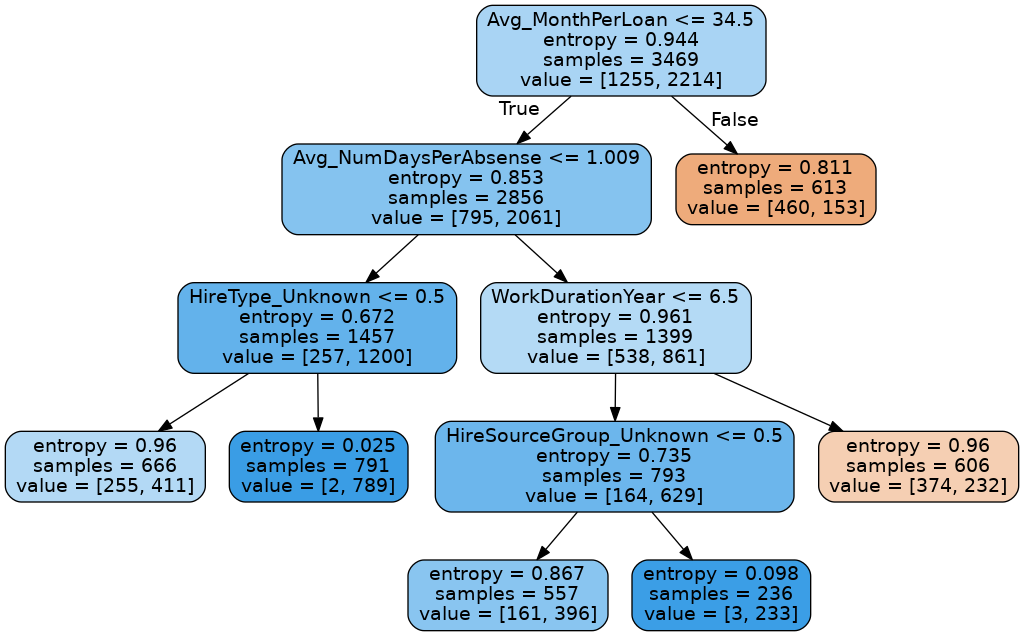

In [48]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

## Random Forests

Now let's compare the decision tree model to a random forest.

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
rfc_pred = rfc.predict(X_test)

In [51]:
print(confusion_matrix(y_test,rfc_pred))

[[616 343]
 [ 59 104]]


In [52]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

        0.0       0.91      0.64      0.75       959
        1.0       0.23      0.64      0.34       163

avg / total       0.81      0.64      0.69      1122

